In [18]:
# prompt: enable access to drive and import 3 excel files from the same directory

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Replace 'your_directory' with the actual path to your directory on Google Drive
directory_path = '/content/drive/MyDrive/Ovil_Manuscript/FeedbackManuscriptOmriLiran/Figures_Sep2024/Fig7_profiles_sections/'

# Define the filenames of your Excel files
excel21 = f'{directory_path}/21_profiles_excel.xlsx'
excel25 = f'{directory_path}/25_profiles_excel.xlsx'
excel27 = f'{directory_path}/27_profiles_excel.xlsx'

# Read the Excel files into pandas DataFrames
df21 = pd.read_excel(excel21)
df25 = pd.read_excel(excel25)
df27 = pd.read_excel(excel27)

print("Files imported successfully:")
print("df21 shape:", df21.shape)
print("df25 shape:", df25.shape)
print("df27 shape:", df27.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files imported successfully:
df21 shape: (1058, 15)
df25 shape: (771, 18)
df27 shape: (298, 12)


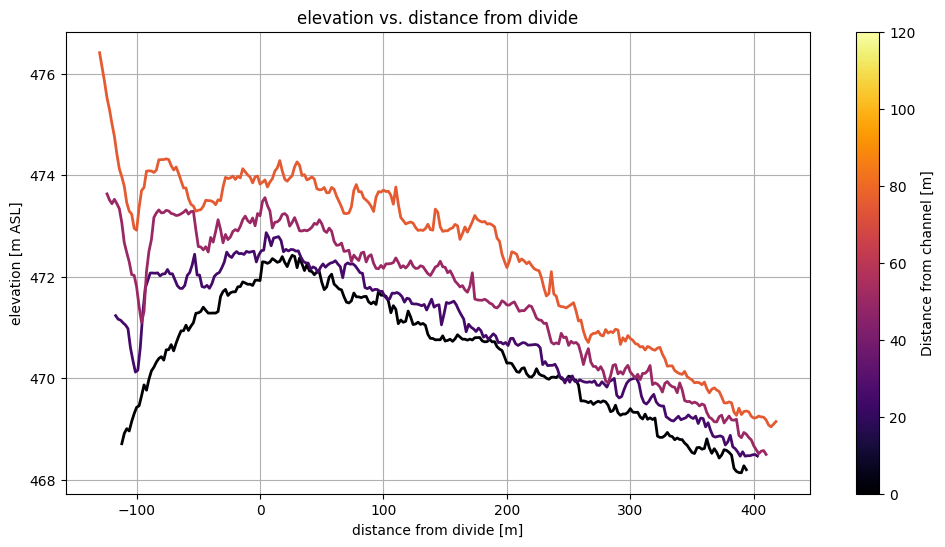

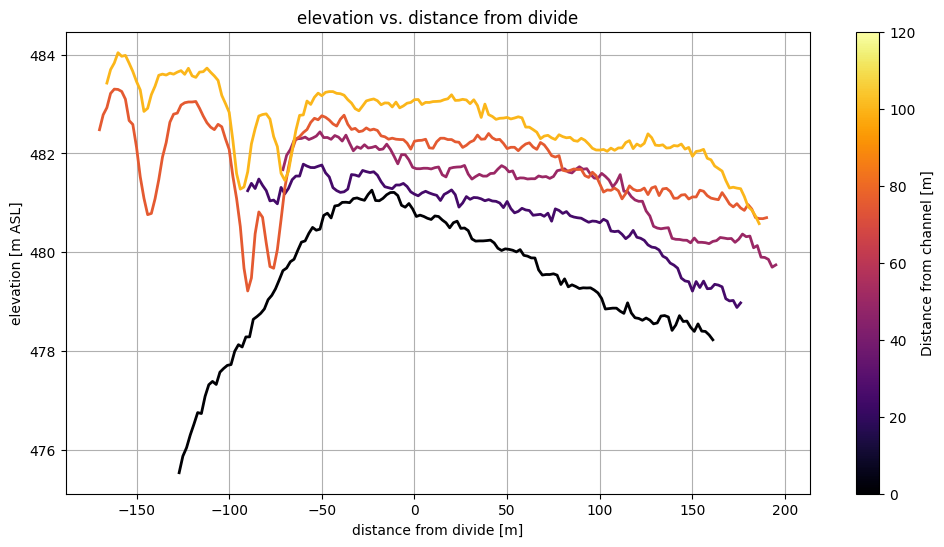

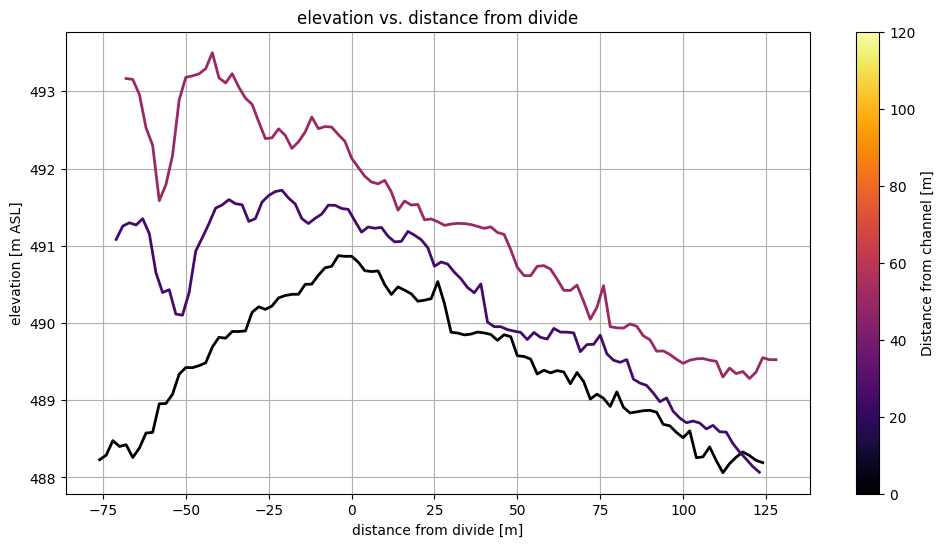

In [ ]:
# prompt: for each of the dataframes, create a figure with a line bar of 'Z_UTM' as function of 'dist_from_divide'; each line should represent all points with the same 'distance', colored with "inferno" color scheme, between 0 (black) and 100

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

dataframes = [df21, df25, df27]

for df in dataframes:
    fig, ax = plt.subplots(figsize=(12, 6)) # Create figure and axes
    distances = df['distance'].unique()
    distances.sort() # Sort distances for consistent color mapping

    norm = colors.Normalize(vmin=0, vmax=120)
    cmap = plt.colormaps['inferno'] # Updated way to access colormap

    for distance in distances:
        df_distance = df[df['distance'] == distance]
        color_value = distance % 101  # Ensure value is between 0 and 100
        ax.plot(df_distance['dist_from_divide'], df_distance['Z_UTM'], label=f'Distance {distance}', color=cmap(norm(color_value)), linewidth=2) # Plot on the created axes

    ax.set_xlabel('distance from divide [m]') # Use axes methods for labels and title
    ax.set_ylabel('elevation [m ASL]')
    ax.set_title('elevation vs. distance from divide')
    # Optional: Add a color bar to show the mapping of distance to color
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax) # Pass the axes to colorbar
    cbar.set_label('Distance from channel [m]')
    ax.grid(True) # Use axes method for grid
    plt.show()

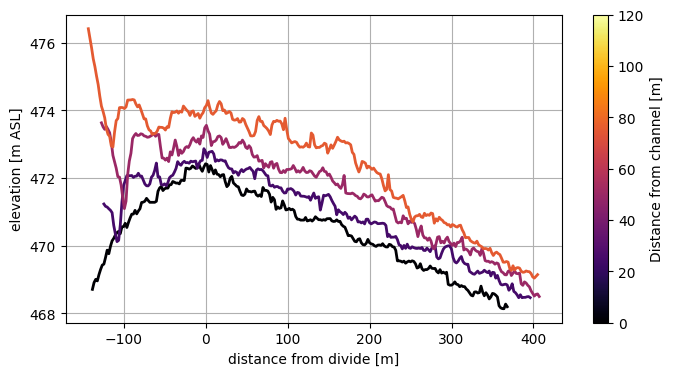

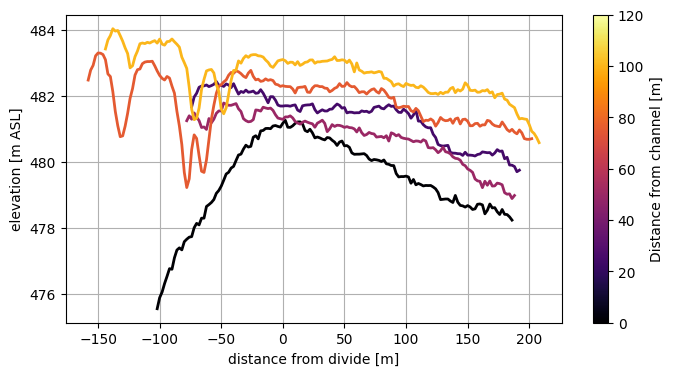

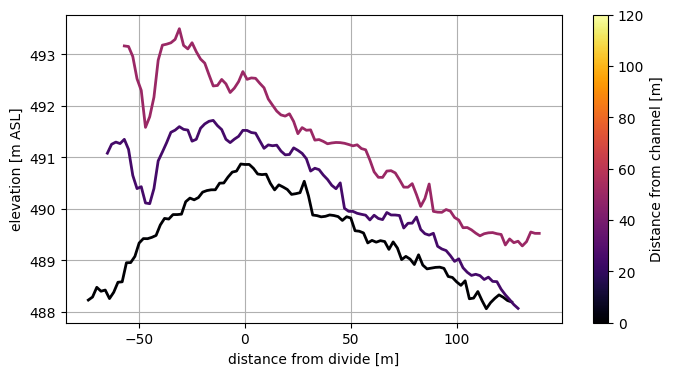

In [21]:
# prompt: for each of the dataframes, create a figure with a line bar of 'Z_UTM' as function of 'dist_from_divide'; each line should represent all points with the same 'distance', colored with "inferno" color scheme, between 0 (black) and 100

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

dataframes = [df21, df25, df27]

for df in dataframes:
    fig, ax = plt.subplots(figsize=(8, 4)) # Create figure and axes
    distances = df['distance'].unique()
    distances.sort() # Sort distances for consistent color mapping

    norm = colors.Normalize(vmin=0, vmax=120)
    cmap = plt.colormaps['inferno'] # Updated way to access colormap

    for distance in distances:
        df_distance = df[df['distance'] == distance]
        color_value = distance % 101  # Ensure value is between 0 and 100
        ax.plot(df_distance['dist_from_new_divide'], df_distance['Z_UTM'], label=f'Distance {distance}', color=cmap(norm(color_value)), linewidth=2) # Plot on the created axes

    ax.set_xlabel('distance from divide [m]') # Use axes methods for labels and title
    ax.set_ylabel('elevation [m ASL]')
    # ax.set_title('elevation vs. distance from divide')
    # Optional: Add a color bar to show the mapping of distance to color
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax) # Pass the axes to colorbar
    cbar.set_label('Distance from channel [m]')
    ax.grid(True) # Use axes method for grid
    plt.show()

In [24]:
# prompt: now export all 3 figures in the last cell, in high resolution png, without title, to /content/drive/MyDrive/Ovil_Manuscript/FeedbackManuscriptOmriLiran/Figures_Sep2024/Fig7_profiles_sections

import matplotlib.pyplot as plt
for i, df in enumerate(dataframes):
    fig, ax = plt.subplots(figsize=(8, 4)) # Create figure and axes
    distances = df['distance'].unique()
    distances.sort() # Sort distances for consistent color mapping

    norm = colors.Normalize(vmin=0, vmax=120)
    cmap = plt.colormaps['inferno'] # Updated way to access colormap

    for distance in distances:
        df_distance = df[df['distance'] == distance]
        color_value = distance % 101  # Ensure value is between 0 and 100
        ax.plot(df_distance['dist_from_new_divide'], df_distance['Z_UTM'], label=f'Distance {distance}', color=cmap(norm(color_value)), linewidth=2) # Plot on the created axes

    ax.set_xlabel('distance from divide [m]') # Use axes methods for labels and title
    ax.set_ylabel('elevation [m asl]')
    # Optional: Add a color bar to show the mapping of distance to color
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax) # Pass the axes to colorbar
    cbar.set_label('distance from channel [m]')
    ax.grid(True) # Use axes method for grid
    plt.savefig(f'{directory_path}/figure_{i+1}.png', dpi=300, bbox_inches='tight')
    plt.close(fig) # Close the figure after saving to free up memory